In [51]:
%pip install -Uq numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt

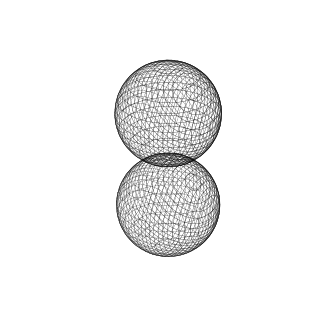

In [57]:
def spherical_harmonics(l, m=0, n=100):
    if m > l:
        raise ValueError('m must be less or equal than l')
    
    phi = np.linspace(0, 2 * np.pi, n)
    theta = np.linspace(0, np.pi, n)
    
    phi, theta = np.meshgrid(phi, theta)

    r = np.abs(sph_harm(m, l, phi, theta))

    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z


def plot_spherical_harmonics(l, m=0, n=100):
    x, y, z = spherical_harmonics(l, m, n)
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection='3d')
    
    args = (x, y, z)
    kargs = dict(levels=30, colors='black', linewidths=.2)

    for dir in ['x', 'y', 'z']: ax.contour(*args, **kargs, zdir=dir)

    # ZOOM
    RADIUS = .85
    ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_box_aspect([1, 1, 1])  # Proporción de los ejes x, y, z

    plt.axis('off')

    plt.savefig(f'Figures/Y{l}-{m}.png', dpi=300)
    plt.show()
    

plot_spherical_harmonics(1,0)

